# Визуализация факторов, влияющих на цену новостроек

In [ ]:

!pip install cianparser --quiet

import cianparser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown
%matplotlib inline


"pip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [ ]:
parser = cianparser.CianParser(location="Москва")
data = parser.get_flats(
    deal_type="sale",
    rooms="all",
    with_saving_csv=False,
    additional_settings={
        "start_page": 1,
        "end_page": 35,
        "object_type": "new"  # новостройки
    }
)
df = pd.DataFrame(data)
print(df.columns.tolist())


                              Preparing to collect information from pages..
The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat&object_type%5B0%5D=2

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 3 %. Average price: 1 396 208 624 rub
 2 | 2 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 56. Progress ratio: 6 %. Average price: 1 465 472 941 rub
 3 | 3 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 84. Progress ratio: 9 %. Average price: 1 485 180 927 rub
 4 | 4 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 112. Progress ratio: 12 %. Average price: 1 497 776 904 rub
 5 | 5 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=

### 📊 1. Гистограмма: распределение площади

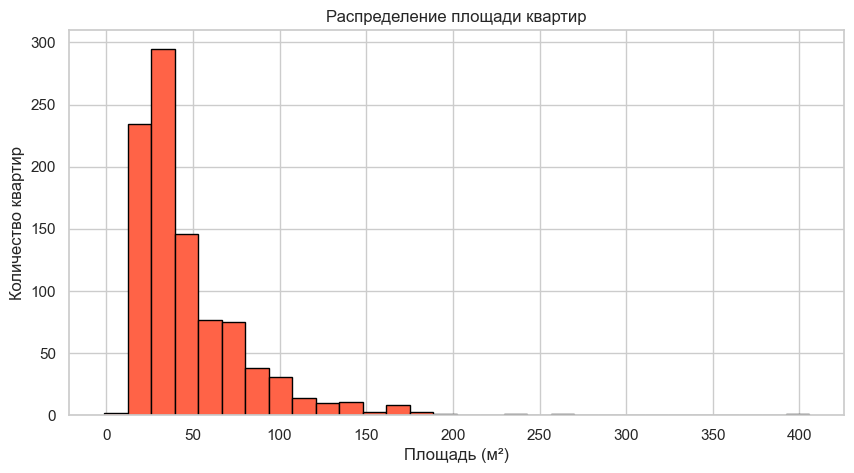

In [4]:

plt.figure(figsize=(10, 5))
plt.hist(df['total_meters'].dropna(), bins=30, color='tomato', edgecolor='black')
plt.title('Распределение площади квартир')
plt.xlabel('Площадь (м²)')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()


### 📊 2. Количество квартир по числу комнат

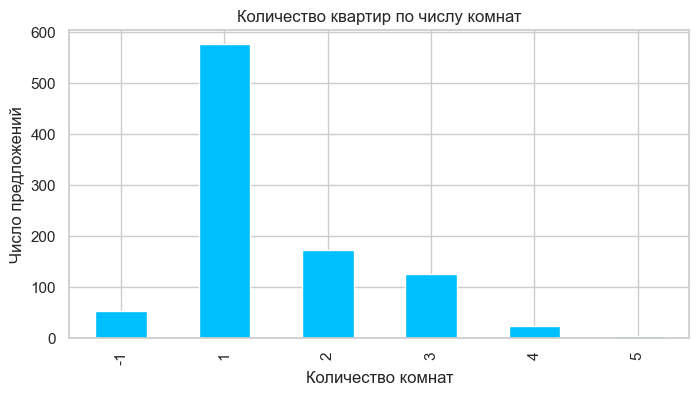

In [5]:

room_counts = df['rooms_count'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
room_counts.plot(kind='bar', color='deepskyblue')
plt.title('Количество квартир по числу комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Число предложений')
plt.grid(True)
plt.show()


### 📊 Корреляции

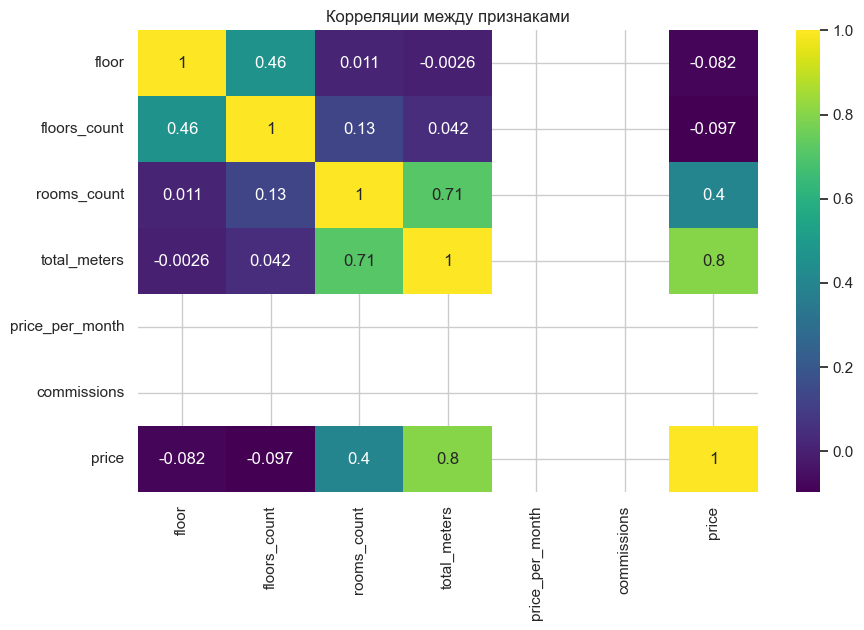

In [13]:

plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Корреляции между признаками')
plt.show()


### 📊 3. Boxplot: цена по числу комнат

C:\Users\sergs\AppData\Local\Temp\ipykernel_12060\2719878343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rooms_count', y='price', data=df, palette='Set2')


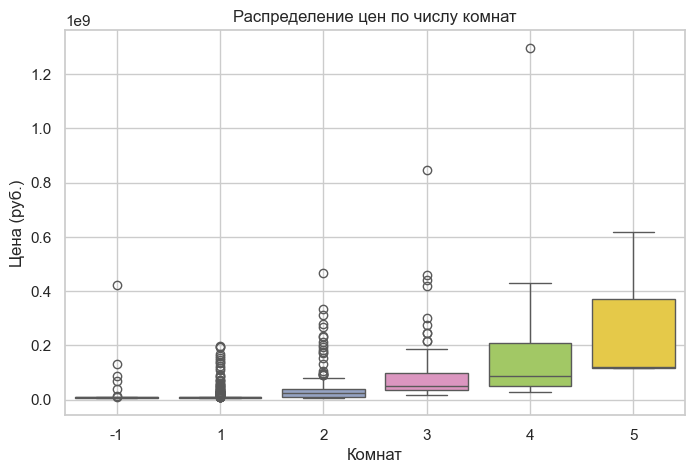

In [6]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='rooms_count', y='price', data=df, palette='Set2')
plt.title('Распределение цен по числу комнат')
plt.xlabel('Комнат')
plt.ylabel('Цена (руб.)')
plt.grid(True)
plt.show()


### 📊 4. Boxplot: цена по этажу

C:\Users\sergs\AppData\Local\Temp\ipykernel_12060\2061860100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='floor', y='price', data=df, palette='coolwarm')


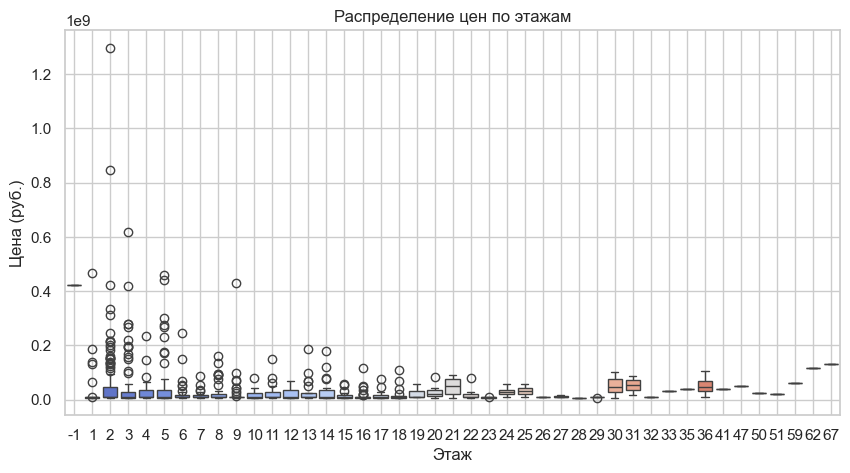

In [7]:

plt.figure(figsize=(10, 5))
sns.boxplot(x='floor', y='price', data=df, palette='coolwarm')
plt.title('Распределение цен по этажам')
plt.xlabel('Этаж')
plt.ylabel('Цена (руб.)')
plt.grid(True)
plt.show()


### 📊 5. Средняя цена по районам

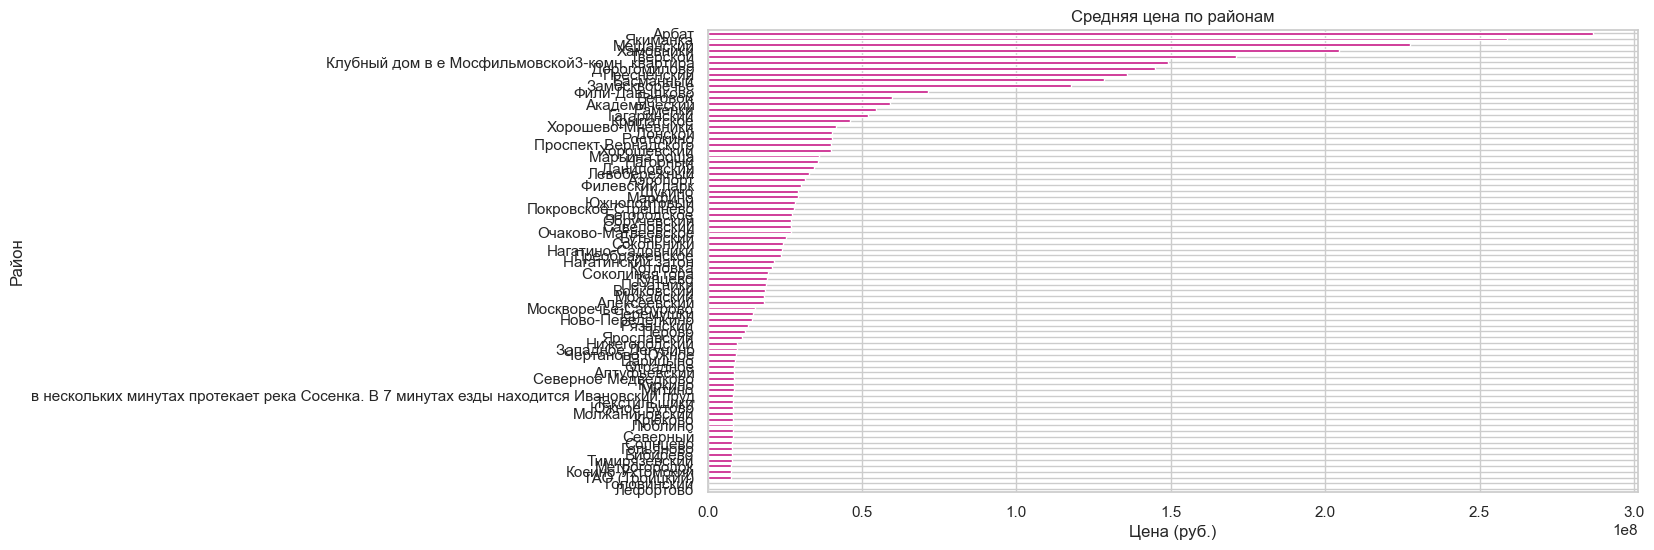

In [8]:

plt.figure(figsize=(12, 6))
df.groupby('district')['price'].mean().sort_values(ascending=False).plot(kind='barh', color='mediumvioletred')
plt.title('Средняя цена по районам')
plt.xlabel('Цена (руб.)')
plt.ylabel('Район')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


### 📊 6. Scatter plot: цена от площади по районам

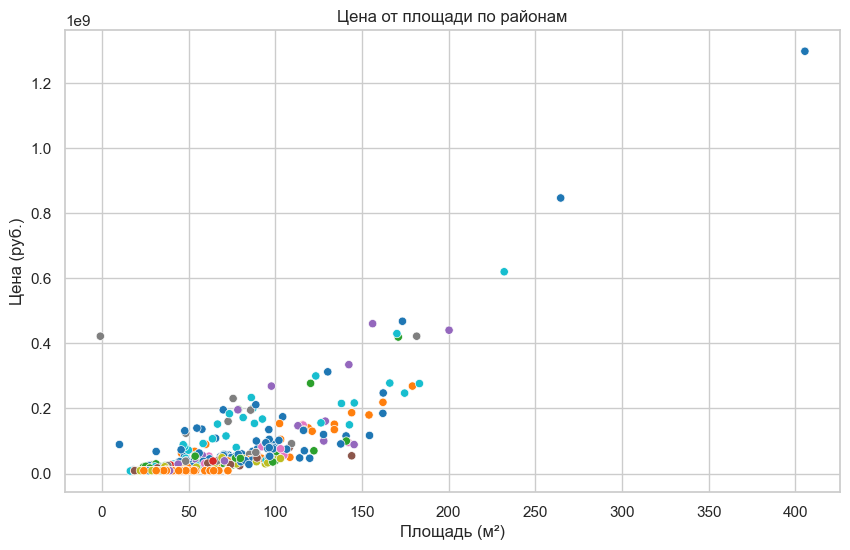

In [9]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_meters', y='price', hue='district', palette='tab10', legend=False)
plt.title('Цена от площади по районам')
plt.xlabel('Площадь (м²)')
plt.ylabel('Цена (руб.)')
plt.grid(True)
plt.show()


### 📊 7. Количество квартир по этажности домов

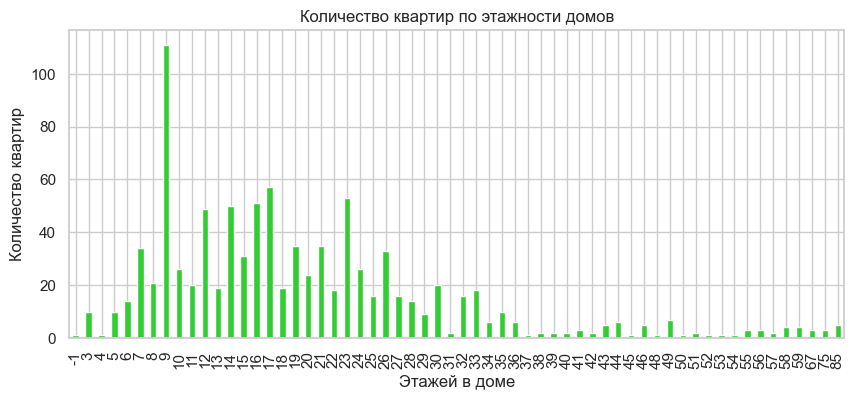

In [10]:

plt.figure(figsize=(10, 4))
df['floors_count'].value_counts().sort_index().plot(kind='bar', color='limegreen')
plt.title('Количество квартир по этажности домов')
plt.xlabel('Этажей в доме')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()


### 📊 8. Самые популярные ЖК (по числу объявлений)

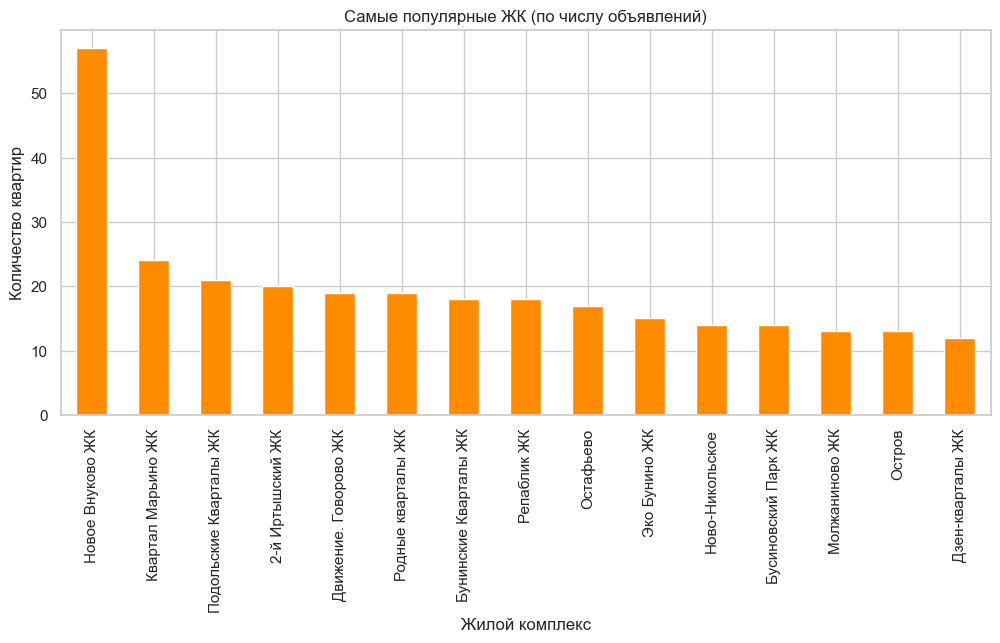

In [11]:

plt.figure(figsize=(12, 5))
df['residential_complex'].value_counts().head(15).plot(kind='bar', color='darkorange')
plt.title('Самые популярные ЖК (по числу объявлений)')
plt.xlabel('Жилой комплекс')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()


### 📊 9. Scatter plot: цена от этажности

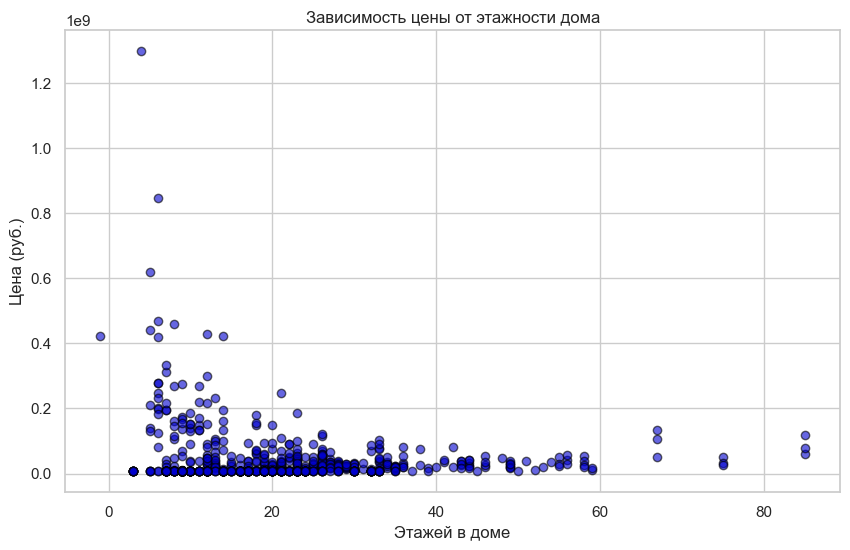

In [12]:

plt.figure(figsize=(10, 6))
plt.scatter(df['floors_count'], df['price'], alpha=0.6, color='mediumblue', edgecolor='black')
plt.title('Зависимость цены от этажности дома')
plt.xlabel('Этажей в доме')
plt.ylabel('Цена (руб.)')
plt.grid(True)
plt.show()
